In [426]:
# EDA를 위한 분석 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#검증 데이터 분리를 위한 함수
from sklearn.model_selection import train_test_split
#학습을 위한 모델 클래스
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#평가를 위한 함수(정확도)
from sklearn.metrics import accuracy_score

In [427]:
train = pd.read_csv("./data/salary/train.csv", index_col="no")
test = pd.read_csv("./data/salary/test.csv" , index_col="no")
display("Train")
display(train.head())
display("Test")
display(test.head())

'Train'

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
no,,,,,,,,,,,,,,,
1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1


'Test'

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
no,,,,,,,,,,,,,,
29306,18,?,245274,Some-college,10,Never-married,?,Own-child,White,Male,0,0,16,United-States
29307,29,Private,83003,HS-grad,9,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,United-States
29308,45,Private,35136,Bachelors,13,Married-civ-spouse,Tech-support,Husband,Black,Male,0,0,40,United-States
29309,42,Self-emp-not-inc,64631,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
29310,41,Private,195821,Doctorate,16,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1902,40,United-States


In [428]:
# 전체 데이터 수 파악
train.shape, test.shape

((29305, 15), (19537, 14))

In [429]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29305 entries, 1 to 29305
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29305 non-null  int64 
 1   workclass       29305 non-null  object
 2   fnlwgt          29305 non-null  int64 
 3   education       29305 non-null  object
 4   education-num   29305 non-null  int64 
 5   marital-status  29305 non-null  object
 6   occupation      29305 non-null  object
 7   relationship    29305 non-null  object
 8   race            29305 non-null  object
 9   sex             29305 non-null  object
 10  capital-gain    29305 non-null  int64 
 11  capital-loss    29305 non-null  int64 
 12  hours-per-week  29305 non-null  int64 
 13  native-country  29305 non-null  object
 14  income          29305 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.6+ MB


In [430]:
# 범주형 데이터
# workclass, education, marital-status, occupation, relationship, race, sex, native-country
# 수치형 데이터
# age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week

In [431]:
display(train.corr()) # 상관계수 확인

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.075753,0.035084,0.078498,0.054413,0.073100,0.238460
fnlwgt,-0.075753,1.000000,-0.030600,-0.005051,-0.001513,-0.010154,-0.002994
education-num,0.035084,-0.030600,1.000000,0.127651,0.083925,0.147569,0.331798
capital-gain,0.078498,-0.005051,0.127651,1.000000,-0.031401,0.088609,0.221387
capital-loss,0.054413,-0.001513,0.083925,-0.031401,1.000000,0.055271,0.135645
hours-per-week,0.073100,-0.010154,0.147569,0.088609,0.055271,1.000000,0.231045
income,0.238460,-0.002994,0.331798,0.221387,0.135645,0.231045,1.000000


In [432]:
train['occupation'].describe()

count               29305
unique                 15
top        Prof-specialty
freq                 3724
Name: occupation, dtype: object

In [433]:
# 결측치 확인(결측치 null이 아닌 " ?"로 처리되어있음) 
# 숫자형에는 결측치 없음
# workclass(1663), occupation(1668), native-country(495) 결측치 있음
# workclass - (결측치private로 처리)
# occupation - 결측치 Prof-specialty 로 처리
# native-country - (결측치United-States로 처리)
train[train['occupation']==" ?"].count()


age               1668
workclass         1668
fnlwgt            1668
education         1668
education-num     1668
marital-status    1668
occupation        1668
relationship      1668
race              1668
sex               1668
capital-gain      1668
capital-loss      1668
hours-per-week    1668
native-country    1668
income            1668
dtype: int64

In [434]:
train['native-country']=train['native-country'].str.replace("?","United-States")
train['workclass']=train['workclass'].str.replace("?","private")
train['occupation']=train['occupation'].str.replace("?","Prof-specialty")

C:\Users\pipi1\AppData\Local\Temp\ipykernel_14636\3733539009.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train['native-country']=train['native-country'].str.replace("?","United-States")
C:\Users\pipi1\AppData\Local\Temp\ipykernel_14636\3733539009.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train['workclass']=train['workclass'].str.replace("?","private")
C:\Users\pipi1\AppData\Local\Temp\ipykernel_14636\3733539009.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train['occupation']=train['occupation'].s

In [435]:
test['native-country']=test['native-country'].str.replace("?","United-States")
test['workclass']=test['workclass'].str.replace("?","private")
test['occupation']=test['occupation'].str.replace("?","Prof-specialty")

C:\Users\pipi1\AppData\Local\Temp\ipykernel_14636\2687328230.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test['native-country']=test['native-country'].str.replace("?","United-States")
C:\Users\pipi1\AppData\Local\Temp\ipykernel_14636\2687328230.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test['workclass']=test['workclass'].str.replace("?","private")
C:\Users\pipi1\AppData\Local\Temp\ipykernel_14636\2687328230.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test['occupation']=test['occupation'].str.rep

In [436]:
train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
no,,,,,,,,,,,,,,,
1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,0
29302,21,Private,372636,HS-grad,9,Never-married,Sales,Own-child,Black,Male,0,0,40,United-States,0
29303,18,Self-emp-not-inc,258474,10th,6,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,0


In [437]:
# 인코딩
# workclass 
# education - education-num이랑 비율같아서 인코딩 필요 없음
# race - white 비율 너무 높음 -> 나머지 합침
# native-country - United-States 비율 높음
# 원핫인코딩 marital-status, occupation, relationship, sex, marital-status, occupation


In [438]:
# train.drop(['education-num'], axis = 1, inplace = True)
# train['education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'],
#                              ' School', inplace = True)
# train['education'].value_counts()

In [439]:
train['native-country'].value_counts()

 United-States                 26796
 Mexico                          579
 Philippines                     178
 Germany                         124
 Puerto-Rico                     117
 Canada                          111
 El-Salvador                      96
 Cuba                             94
 India                            90
 England                          75
 South                            74
 Jamaica                          68
 China                            68
 Dominican-Republic               61
 Italy                            60
 Japan                            54
 Columbia                         53
 Poland                           53
 Guatemala                        51
 Haiti                            51
 Vietnam                          50
 Portugal                         43
 Taiwan                           39
 Iran                             38
 Nicaragua                        28
 Peru                             25
 Greece                           25
 

In [440]:
train[['occupation','income']].groupby(['occupation']).mean().sort_values(by='income')

,income
occupation,
Priv-house-serv,0.020548
Other-service,0.043361
Handlers-cleaners,0.066453
Farming-fishing,0.106982
Machine-op-inspct,0.131971
Adm-clerical,0.133140
Transport-moving,0.202441
Craft-repair,0.225771
Sales,0.275516


In [441]:
# 라벨인코딩 marital-status,occupation(income 과 비교해서 라벨링 해보기)
# occupation
a=(train[['occupation','income']].groupby(['occupation']).mean().sort_values(by="income").reset_index())
a['occupation'].to_dict()

{0: ' Priv-house-serv',
 1: ' Other-service',
 2: ' Handlers-cleaners',
 3: ' Farming-fishing',
 4: ' Machine-op-inspct',
 5: ' Adm-clerical',
 6: ' Transport-moving',
 7: ' Craft-repair',
 8: ' Sales',
 9: ' Tech-support',
 10: ' Armed-Forces',
 11: ' Protective-serv',
 12: ' Prof-specialty',
 13: ' Exec-managerial'}

In [442]:
method_dict = {
    ' Priv-house-serv':0,
    ' Other-service':1,
    ' Handlers-cleaners':2,
    ' ?':3,
    ' Farming-fishing':4,
    ' Machine-op-inspct':5,
    ' Adm-clerical':6,
    ' Transport-moving':7,
    ' Craft-repair':8,
    ' Sales':9,
    ' Tech-support':10,
    ' Armed-Forces':11,
    ' Protective-serv':12,
    ' Prof-specialty':13,
    ' Exec-managerial':14
    }
train['occupation']=train['occupation'].map(method_dict)
test['occupation']=test['occupation'].map(method_dict)

In [443]:
# marital-status
a=(train[['marital-status','income']].groupby(['marital-status']).mean().sort_values(by="income").reset_index())
a

,marital-status,income
0,Never-married,0.046831
1,Separated,0.067834
2,Widowed,0.083864
3,Married-spouse-absent,0.093909
4,Divorced,0.104467
5,Married-AF-spouse,0.380952
6,Married-civ-spouse,0.448954


In [444]:
method_dict = {
    ' Never-married':0,
    ' Separated':1,
    ' Widowed':2,
    ' Married-spouse-absent':3,
    ' Divorced':4,
    ' Married-AF-spouse':5,
    ' Married-civ-spouse':6
 }
train['marital-status']=train['marital-status'].map(method_dict)
test['marital-status']=test['marital-status'].map(method_dict)


In [445]:
train[['marital-status','income']].groupby(['marital-status']).mean().sort_values(by="income")

,income
marital-status,
0,0.046831
1,0.067834
2,0.083864
3,0.093909
4,0.104467
5,0.380952
6,0.448954


In [446]:
train['race'].unique()
train['race'].replace(['Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],' Other', inplace = True)

In [447]:
# 정답 분리

y = train.loc[:,'income'] 
X = train.drop(['income'],axis=1)
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
no,,,,,,,,,,,,,,
1,25,Private,219199,11th,7,4,5,Not-in-family,White,Male,0,0,40,United-States
2,39,Private,52978,Some-college,10,4,1,Not-in-family,White,Female,0,1721,55,United-States
3,35,Private,196899,Bachelors,13,0,2,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti
4,64,Private,135527,Assoc-voc,11,4,10,Not-in-family,White,Female,0,0,40,United-States
5,24,Private,60783,Some-college,10,6,7,Husband,White,Male,0,0,70,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,20,Private,100605,HS-grad,9,0,9,Own-child,Other,Male,0,0,40,Puerto-Rico
29302,21,Private,372636,HS-grad,9,0,9,Own-child,Black,Male,0,0,40,United-States
29303,18,Self-emp-not-inc,258474,10th,6,0,4,Own-child,White,Male,0,0,40,United-States


In [448]:
train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
no,,,,,,,,,,,,,,,
1,25,Private,219199,11th,7,4,5,Not-in-family,White,Male,0,0,40,United-States,0
2,39,Private,52978,Some-college,10,4,1,Not-in-family,White,Female,0,1721,55,United-States,0
3,35,Private,196899,Bachelors,13,0,2,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
4,64,Private,135527,Assoc-voc,11,4,10,Not-in-family,White,Female,0,0,40,United-States,0
5,24,Private,60783,Some-college,10,6,7,Husband,White,Male,0,0,70,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,20,Private,100605,HS-grad,9,0,9,Own-child,Other,Male,0,0,40,Puerto-Rico,0
29302,21,Private,372636,HS-grad,9,0,9,Own-child,Black,Male,0,0,40,United-States,0
29303,18,Self-emp-not-inc,258474,10th,6,0,4,Own-child,White,Male,0,0,40,United-States,0


In [449]:
#원핫 인코딩  marital-status, occupation, relationship, sex
feature_names=[ 'education','relationship', 'sex','race','native-country']               
train_one_hot = pd.get_dummies(X[feature_names])
train_one_hot

,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
no,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
29302,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
29303,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [450]:
# test처리
test_one_hot = pd.get_dummies(test[feature_names])
test_one_hot

,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
no,,,,,,,,,,,,,,,,,,,,,
29306,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
29307,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
29308,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
29309,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
29310,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [451]:
# 원핫인코딩한거 붙이기
train = pd.concat([X,train_one_hot], axis=1)
test = pd.concat([test,test_one_hot], axis=1)

In [452]:
train.drop(feature_names,axis=1,inplace=True)
test.drop(feature_names,axis=1,inplace=True)

In [453]:
display(train.corr())

,age,fnlwgt,education-num,marital-status,occupation,capital-gain,capital-loss,hours-per-week,education_ 10th,education_ 11th,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
age,1.000000,-0.075753,0.035084,0.454595,0.135697,0.078498,0.054413,0.073100,-0.016402,-8.985184e-02,...,0.002053,0.006689,0.019706,0.002682,-0.013193,0.003635,0.000169,0.013611,-0.015880,0.004885
fnlwgt,-0.075753,1.000000,-0.030600,-0.036281,-0.009637,-0.005051,-0.001513,-0.010154,0.008661,-2.611842e-07,...,-0.013027,0.009008,-0.005327,-0.009146,-0.004226,-0.003534,0.006659,-0.079893,-0.004631,0.010224
education-num,0.035084,-0.030600,1.000000,0.071478,0.421944,0.127651,0.083925,0.147569,-0.268846,-2.320261e-01,...,-0.039738,-0.045836,-0.006628,0.012659,0.044341,0.016290,-0.008877,0.130978,-0.003909,0.001211
marital-status,0.454595,-0.036281,0.071478,1.000000,0.156845,0.082171,0.064557,0.237490,-0.029695,-7.357591e-02,...,0.005982,-0.010297,0.006705,-0.000253,-0.001165,-0.004662,-0.004501,0.002458,-0.009853,0.009402
occupation,0.135697,-0.009637,0.421944,0.156845,1.000000,0.094998,0.069388,0.128356,-0.083965,-9.074074e-02,...,-0.016802,-0.024988,0.000062,0.014380,0.030012,0.000436,-0.009251,0.076202,-0.018952,-0.000820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-country_ Thailand,0.003635,-0.003534,0.016290,-0.004662,0.000436,-0.001805,0.000673,-0.002276,-0.003830,-4.377535e-03,...,-0.000867,-0.001433,-0.000397,-0.001139,-0.000826,1.000000,-0.000477,-0.073956,-0.000936,-0.000477
native-country_ Trinadad&Tobago,0.000169,0.006659,-0.008877,-0.004501,-0.009251,-0.002370,-0.004572,-0.001803,-0.003565,4.615765e-03,...,-0.000808,-0.001334,-0.000369,-0.001060,-0.000769,-0.000477,1.000000,-0.068846,-0.000871,-0.000444
native-country_ United-States,0.013611,-0.079893,0.130978,0.002458,0.076202,0.010223,0.012313,0.003285,0.002864,9.791093e-04,...,-0.125276,-0.206907,-0.057280,-0.164429,-0.119299,-0.073956,-0.068846,1.000000,-0.135104,-0.068846
native-country_ Vietnam,-0.015880,-0.004631,-0.003909,-0.009853,-0.018952,-0.004058,0.006336,-0.007040,0.003054,-3.562725e-03,...,-0.001585,-0.002617,-0.000725,-0.002080,-0.001509,-0.000936,-0.000871,-0.135104,1.000000,-0.000871


In [454]:
train.drop(['workclass'],axis=1,inplace=True)
train

,age,fnlwgt,education-num,marital-status,occupation,capital-gain,capital-loss,hours-per-week,education_ 10th,education_ 11th,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
no,,,,,,,,,,,,,,,,,,,,,
1,25,219199,7,4,5,0,0,40,0,1,...,0,0,0,0,0,0,0,1,0,0
2,39,52978,10,4,1,0,1721,55,0,0,...,0,0,0,0,0,0,0,1,0,0
3,35,196899,13,0,2,0,0,50,0,0,...,0,0,0,0,0,0,0,0,0,0
4,64,135527,11,4,10,0,0,40,0,0,...,0,0,0,0,0,0,0,1,0,0
5,24,60783,10,6,7,0,0,70,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,20,100605,9,0,9,0,0,40,0,0,...,0,1,0,0,0,0,0,0,0,0
29302,21,372636,9,0,9,0,0,40,0,0,...,0,0,0,0,0,0,0,1,0,0
29303,18,258474,6,0,4,0,0,40,1,0,...,0,0,0,0,0,0,0,1,0,0


In [455]:
test.drop(['workclass'],axis=1,inplace=True)

In [456]:
train

,age,fnlwgt,education-num,marital-status,occupation,capital-gain,capital-loss,hours-per-week,education_ 10th,education_ 11th,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
no,,,,,,,,,,,,,,,,,,,,,
1,25,219199,7,4,5,0,0,40,0,1,...,0,0,0,0,0,0,0,1,0,0
2,39,52978,10,4,1,0,1721,55,0,0,...,0,0,0,0,0,0,0,1,0,0
3,35,196899,13,0,2,0,0,50,0,0,...,0,0,0,0,0,0,0,0,0,0
4,64,135527,11,4,10,0,0,40,0,0,...,0,0,0,0,0,0,0,1,0,0
5,24,60783,10,6,7,0,0,70,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,20,100605,9,0,9,0,0,40,0,0,...,0,1,0,0,0,0,0,0,0,0
29302,21,372636,9,0,9,0,0,40,0,0,...,0,0,0,0,0,0,0,1,0,0
29303,18,258474,6,0,4,0,0,40,1,0,...,0,0,0,0,0,0,0,1,0,0


In [457]:
# 새로 추가한 Cabin_T 때문에 test의 컬럼순서가 1칸씩 밀림
# (train에만 있는 컬럼이라 학습한거와 테스트할때 다를 수 있음)
train.sort_index(axis=1,inplace=True)
test.sort_index(axis=1,inplace=True)

In [458]:
set(train.columns)-set(test.columns)

{'native-country_ Holand-Netherlands'}

In [459]:
train.shape, test.shape

((29305, 78), (19537, 77))

In [460]:
test['native-country_ Holand-Netherlands'] = 0

In [461]:
test

,age,capital-gain,capital-loss,education-num,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,...,race_ White,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Female,sex_ Male,native-country_ Holand-Netherlands
no,,,,,,,,,,,,,,,,,,,,,
29306,18,0,0,10,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
29307,29,0,0,9,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
29308,45,0,0,13,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
29309,42,0,0,13,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
29310,41,0,1902,16,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,45,0,0,9,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
48839,48,0,0,9,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
48840,63,4386,0,10,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0


In [462]:
# 모델 정의
knn_model = KNeighborsClassifier()
tree_model = DecisionTreeClassifier()

In [463]:
# 2. 훈련데이터를 8:2로 분리해서 train2,val셋으로 구성
# (randomstate = 921)
X_train2,X_val,y_train2,y_val=train_test_split(train,y,test_size=0.2, random_state=0)

In [464]:
#3-1. KNN 모델 최적화
train_score_list = []   # 훈련데이터 점수 리스트
val_score_list = []   # 검증데이터 점수 리스트
for n in range(1,25):   #이웃의 숫자를 1~24명 설정
    m=KNeighborsClassifier(n_neighbors=n)
    m.fit(X_train2,y_train2)
    # 훈련데이터 예측 및 평가
    pre_train = m.predict(X_train2)
    score_train = accuracy_score(y_train2, pre_train)
    train_score_list.append(score_train)
    # 검증데이터 예측 및 평가
    pre_val = m.predict(X_val)
    score_val = accuracy_score(y_val,pre_val)
    val_score_list.append(score_val)


KeyboardInterrupt: 

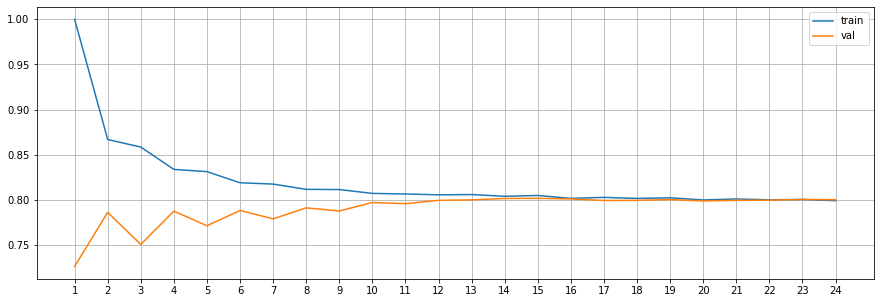

In [ ]:
# 시각화 
plt.figure(figsize=(15,5)) # 그림의 크기 설정(가로,세로) 인치
plt.plot(range(1,25),train_score_list, label='train') # 라인1
plt.plot(range(1,25),val_score_list, label='val') # 라인2
plt.xticks(range(1,25)) # x축 눈금
plt.grid() # 배경 격자무늬
plt.legend() # 범례
plt.show() # 그림 보여주기


In [ ]:
# 3-2 tree 모델 최적화
train_score_list=[] #훈련데이터 평가 점수가 담긴다.
val_score_list=[] #검증데이터 평가 점수가 담긴다.
for d in range(1,31): 
    m = DecisionTreeClassifier(max_depth=d) # 최대깊이가 다른 모델을 계속 생성
    m.fit(X_train2,y_train2)
    #훈련데이터 예측
    pre_train = m.predict(X_train2) 
    score_train=accuracy_score(y_train2,pre_train)
    train_score_list.append(score_train)
    #검증데이터 예측
    pre_val = m.predict(X_val)
    score_val=accuracy_score(y_val,pre_val)
    val_score_list.append(score_val)

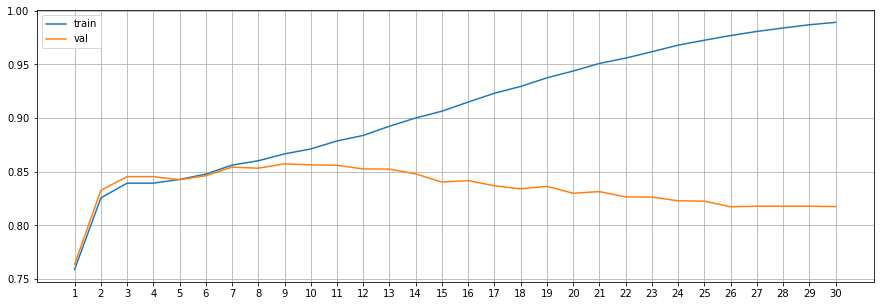

In [ ]:
# 시각화 
plt.figure(figsize=(15,5)) # 그림의 크기 설정(가로,세로) 인치
plt.plot(range(1,31),train_score_list, label='train') # 라인1
plt.plot(range(1,31),val_score_list, label='val') # 라인2
plt.xticks(range(1,31)) # x축 눈금
plt.grid() # 배경 격자무늬
plt.legend() # 범례
plt.show() # 그림 보여주기

In [ ]:
# 3. 최종 학습
final_knn_model = KNeighborsClassifier(n_neighbors=10)
final_tree_model = DecisionTreeClassifier(max_depth=9)

X_train1,X_val,y_train1,y_val=train_test_split(train,y,test_size=0.2, random_state=8)                                                                                                                       
final_knn_model.fit(X_train1,y_train1)
pre= final_knn_model.predict(X_val)
pre
score = accuracy_score(y_val,pre)
print("knn정확도 : ",score)

X_train2,X_val1,y_train2,y_val1=train_test_split(train,y,test_size=0.3, random_state=8)                                                                                                                       
final_tree_model.fit(X_train2,y_train2)
pre= final_tree_model.predict(X_val1)
pre
score = accuracy_score(y_val1,pre)
print("tree정확도 : ",score)

knn정확도 :  0.7935505886367514
tree정확도 :  0.8510009099181074


In [ ]:
test.shape, train.shape

((19537, 78), (29305, 78))

In [ ]:
X_train2

,age,capital-gain,capital-loss,education-num,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,...,race_ Other,race_ White,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Female,sex_ Male
no,,,,,,,,,,,,,,,,,,,,,
11295,32,0,0,6,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
5063,62,0,0,16,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
22077,56,0,0,10,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
14060,41,0,0,10,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
27737,28,0,0,10,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182,67,0,0,4,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,1
26986,55,0,0,10,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
18418,38,0,0,13,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0


In [ ]:
#전처리한 파일 저장
train.to_csv("./data/salary/preprocessing_X_train1.csv")
test.to_csv("./data/salary/preprocessing_X_test1.csv")
y.to_csv("./data/salary/y_train1.csv")

In [ ]:
salary_model = DecisionTreeClassifier(max_depth=9)

In [ ]:
train.shape,test.shape

((29305, 106), (19537, 106))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(test), columns = X.columns)

ValueError: could not convert string to float: ' 11th'

In [466]:
train.columns

Index(['age', 'capital-gain', 'capital-loss', 'education-num',
       'education_ 10th', 'education_ 11th', 'education_ 12th',
       'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th',
       'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc',
       'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad',
       'education_ Masters', 'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'fnlwgt', 'hours-per-week', 'marital-status',
       'native-country_ Cambodia', 'native-country_ Canada',
       'native-country_ China', 'native-country_ Columbia',
       'native-country_ Cuba', 'native-country_ Dominican-Republic',
       'native-country_ Ecuador', 'native-country_ El-Salvador',
       'native-country_ England', 'native-country_ France',
       'native-country_ Germany', 'native-country_ Greece',
       'native-country_ Guatemala', 'native-country_ Haiti',
       'native-country_ Holand-Netherlands', 'native-c

In [468]:

X_train= train[['age','education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'marital-status','occupation',
       'race_ Amer-Indian-Eskimo', 'race_ Asian-Pac-Islander', 'race_ Black',
       'race_ Other', 'race_ White', 'relationship_ Husband',
       'relationship_ Not-in-family', 'relationship_ Other-relative',
       'relationship_ Own-child', 'relationship_ Unmarried',
       'relationship_ Wife', 'sex_ Female', 'sex_ Male','native-country_ Yugoslavia', 'native-country_ United-States']]

y_train= y
X_train1,X_val,y_train1,y_val=train_test_split(X_train,y_train,test_size=0.2, random_state=16)                                                                                                                       
salary_model.fit(X_train1,y_train1)
pre= salary_model.predict(X_val)
pre
score = accuracy_score(y_val,pre)
print("정확도 : ",score)

정확도 :  0.865040095546835


In [ ]:
train.columns

Index(['age', 'capital-gain', 'capital-loss', 'education-num',
       'education_ 10th', 'education_ 11th', 'education_ 12th',
       'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th',
       ...
       'sex_ Male', 'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'workclass_ private'],
      dtype='object', length=107)

In [469]:
# 캐글 업로드
test= test[['age','education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'marital-status','occupation',
       'race_ Amer-Indian-Eskimo', 'race_ Asian-Pac-Islander', 'race_ Black',
       'race_ Other', 'race_ White', 'relationship_ Husband',
       'relationship_ Not-in-family', 'relationship_ Other-relative',
       'relationship_ Own-child', 'relationship_ Unmarried',
       'relationship_ Wife', 'sex_ Female', 'sex_ Male','native-country_ Yugoslavia', 'native-country_ United-States']]

In [ ]:
test_pre=salary_model.predict(test)
test_pre

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [470]:
#전처리한 파일 저장
X_train.to_csv("./data/salary/preprocessing_X_train5.csv")
test.to_csv("./data/salary/preprocessing_X_test5.csv")
y_train.to_csv("./data/salary/y_train5.csv")